# Finding optimal location to open restaurant in London

## 1. Introduction

As increasing numbers of consumers wants to dine out or take prepared food home, the demand of restaurants increased rapidly from 155,000 to nearly 960,000 today in about 40 years. Owning and operating restaurant business is a dream of many people, but hard reality is many restaurants fail during their first year, frequently due to lack of planning. There is still a room in the market for restaurant business with decent planning. A restaurant's location is as crucial to its success as great food and service. While choosing your restaurant’s location, it is important to identify where your intended customers are located.

London is the capital and largest city of England and the United Kingdom. Opening restaurant in the capital city like London can be challenging. One may need to make huge investment but, before making such investments you want to be certain about the place to enjoy maximum patrons. London has a large population of people from different foreign countries from Asia, Australia, America, Middle east. The 2011 census recorded that 2,998,264 people or 36.7% of London's population are foreign-born making London the city with the second largest immigrant population, behind New York City. Ethnicity is one of the many factors that play a role in food choices so factors such as the kind of demographics who live there (Racial make-up, ethnic groups) can give investors a good start off. In this project, we aim to find ideal location for opening Asian restaurant in London through analysis of demographics of London to choose best borough and explore neighbourhoods of that borough.


## 2. Data

### 2.1 Data Sources

To solve the problem, data showing demographical representation of London, list of boroughs and neighbourhood location and its geographical coordinates will be used in the analysis.

1.	To demonstrate the Ethnic make-up of London(2011 Census). The data is scraped from Wikipedia:        https://en.wikipedia.org/wiki/Demography_of_London
2.	The List of all boroughs of London is scraped from the Wikipedia page: https://en.wikipedia.org/wiki/London_boroughs
3.	Demography of London giving more details about Racial make-up of London boroughs (2011 Census) was obtained by scraping web     page: https://en.wikipedia.org/wiki/Demography_of_London
4.	Neighbourhoods of Newham was obtained by web scraping the list available on the page                       https://en.wikipedia.org/wiki/London_Borough_of_Newham#Districts
5.	Geographical co-ordinates of Boroughs of London and Neighbourhoods of Newham was obtained using Geopy Library (Geocoding       Web Services).
6.	Foursquare location data (Foursquare API) used to explore neighbourhoods of Newham and find optimal location for opening an     Asian restaurant within defined radius of each neighbourhood.




#### Let's start by improting all necessary libraries.

In [1]:
# library for data analsysis
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle requests
import requests 

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# this module helps in web scrapping.
from bs4 import BeautifulSoup 

#Import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

! pip install folium
import folium # map rendering library

!pip install geocoder
import geocoder



Solving environment: ...working... done

# All requested packages already installed.



### 2.2.1 Let's first analyze ethnic make-up of London as it will be helpul to discover our target customer's population in London  

In [2]:
ethinic_link = "https://en.wikipedia.org/wiki/Demography_of_London"
tables = pd.read_html(ethinic_link,match="Ethnic make-up of Greater London")
print("There are : ",len(tables)," tables")

There are :  1  tables


In [3]:
london_ethnic_fig=pd.DataFrame(tables[0])
london_ethnic_fig.head()

Ethnic Group    1991[6]            2001[7]  \
                              Ethnic Group     Number       %     Number   
0                   White: British[Note 1]        NaN     NaN  4287861.0   
1                             White: Irish   256470.0   3.83%   220488.0   
2  White: Gypsy or Irish Traveller[Note 2]        NaN     NaN        NaN   
3                     White: Other[Note 1]        NaN     NaN   594854.0   
4                             White: Total  5333580.0  79.80%  5103203.0   

           2011[8]         Change 2001–2011  
        %   Number       %                %  
0  59.79%  3669284  44.89%           14.43%  
1   3.07%   175974   2.15%           20.19%  
2     NaN     8196   0.10%              NaN  
3   8.29%  1033981  12.65%           73.82%  
4  71.15%  4887435  59.79%            4.23%

In [4]:
#Check number of variables and names
print("There are",len(london_ethnic_fig.columns), "columns in the dataframe")
print(london_ethnic_fig.columns)

There are 8 columns in the dataframe
MultiIndex([(    'Ethnic Group', 'Ethnic Group'),
            (         '1991[6]',       'Number'),
            (         '1991[6]',            '%'),
            (         '2001[7]',       'Number'),
            (         '2001[7]',            '%'),
            (         '2011[8]',       'Number'),
            (         '2011[8]',            '%'),
            ('Change 2001–2011',            '%')],
           )


#### The table scraped from wiki page was mulitindex table and after reading it into dataframe we got multi-index column so first flatten index and convert it into single index column dataframe

In [5]:
london_ethnic_fig.columns = london_ethnic_fig.columns.to_flat_index()
london_ethnic_fig.head(2)

,"(Ethnic Group, Ethnic Group)","(1991[6], Number)","(1991[6], %)","(2001[7], Number)","(2001[7], %)","(2011[8], Number)","(2011[8], %)","(Change 2001–2011, %)"
0,White: British[Note 1],NaN,NaN,4287861.0,59.79%,3669284,44.89%,14.43%
1,White: Irish,256470.0,3.83%,220488.0,3.07%,175974,2.15%,20.19%


In [6]:
# Change column names for clarity
london_ethnic_fig = london_ethnic_fig.rename(columns={('Ethnic Group', 'Ethnic Group'): 'Ethnic Group'})
london_ethnic_fig = london_ethnic_fig.rename(columns={('1991[6]', 'Number'): '1991 Census[Number]'})
london_ethnic_fig = london_ethnic_fig.rename(columns={('1991[6]', '%'): '1991 Census[%]'})
london_ethnic_fig = london_ethnic_fig.rename(columns={('2001[7]', 'Number'): '2001 Census[Number]'})
london_ethnic_fig = london_ethnic_fig.rename(columns={('2001[7]', '%'): '2001 Census[%]'})
london_ethnic_fig = london_ethnic_fig.rename(columns={('2011[8]', 'Number'): '2011 Census[Number]'})
london_ethnic_fig = london_ethnic_fig.rename(columns={('2011[8]', '%'):'2011 Census[%]'})
london_ethnic_fig = london_ethnic_fig.rename(columns={('Change 2001–2011', '%'):'Change 2001-2011'})

#Checking whether all column names are string
print(london_ethnic_fig.columns)
all(isinstance(column, str) for column in london_ethnic_fig.columns)

Index(['Ethnic Group', '1991 Census[Number]', '1991 Census[%]',
       '2001 Census[Number]', '2001 Census[%]', '2011 Census[Number]',
       '2011 Census[%]', 'Change 2001-2011'],
      dtype='object')


True

In [7]:
#As it is multiindex table it is necessory to check datatypes of each columns
london_ethnic_fig.dtypes

Ethnic Group            object
1991 Census[Number]    float64
1991 Census[%]          object
2001 Census[Number]    float64
2001 Census[%]          object
2011 Census[Number]      int64
2011 Census[%]          object
Change 2001-2011        object
dtype: object

In [8]:
#Remove columns which are not required 
london_ethnic_fig = london_ethnic_fig.drop(['Change 2001-2011'], axis=1)

#Remove % sign from dataframe
london_ethnic_fig=london_ethnic_fig.replace({'%':''}, regex=True)

#As there are few "NaN" values for majorly for "1991-2000" and "2001-2010" but for analysis I am more interested in "2011-2020"
#So I am directly replacing NaN with 0
london_ethnic_fig = london_ethnic_fig.fillna(0)

#Remove unnecessory character from "Ethnic Group column"
london_ethnic_fig['Ethnic Group'] = london_ethnic_fig['Ethnic Group'].map(lambda x: x.rstrip(']').rstrip('123').rstrip('Note ').rstrip('['))

#Change columns to float 
cols = ['1991 Census[%]', '2001 Census[%]','2011 Census[%]']
london_ethnic_fig[cols] = london_ethnic_fig[cols].apply(pd.to_numeric, errors='coerce', axis=1)

#Change columns to Integer 
london_ethnic_fig[["1991 Census[Number]"]] = london_ethnic_fig[["1991 Census[Number]"]].astype("int")
london_ethnic_fig[["2001 Census[Number]"]] = london_ethnic_fig[["2001 Census[Number]"]].astype("int")
london_ethnic_fig[["2011 Census[Number]"]] = london_ethnic_fig[["2011 Census[Number]"]].astype("int")

In [9]:
# let's populate clean table
london_ethnic_fig

,Ethnic Group,1991 Census[Number],1991 Census[%],2001 Census[Number],2001 Census[%],2011 Census[Number],2011 Census[%]
0,White: British,0,0.00,4287861,59.79,3669284,44.89
1,White: Irish,256470,3.83,220488,3.07,175974,2.15
2,White: Gypsy or Irish Traveller,0,0.00,0,0.00,8196,0.10
3,White: Other,0,0.00,594854,8.29,1033981,12.65
4,White: Total,5333580,79.80,5103203,71.15,4887435,59.79
5,Asian or Asian British: Indian,347091,5.19,436993,6.09,542857,6.64
6,Asian or Asian British: Pakistani,87816,1.31,142749,1.99,223797,2.74
7,Asian or Asian British: Bangladeshi,85738,1.28,153893,2.15,222127,2.72
8,Asian or Asian British: Chinese,56579,0.84,80201,1.12,124250,1.52
9,Asian or Asian British: Other Asian,112807,1.68,133058,1.86,398515,4.88


#### Above table shows large proportion of White ethnic group population which is obvious but 2nd large population is Asian group
#### It is also giving insight  white ethnic group population proportion fell in 2011 census by 11.36% and Asian population is increased by 5.29% so Asian population evidently increasing in London which is a good sign for someone looking to open Asian restaurant

In [10]:
london_ethnic_fig1 = london_ethnic_fig[london_ethnic_fig['Ethnic Group'].str.contains('Total')]
london_ethnic_fig2 = london_ethnic_fig1[['Ethnic Group','1991 Census[%]','2001 Census[%]','2011 Census[%]']]
london_ethnic_fig2.reset_index(drop=True, inplace=True)
london_ethnic_fig2.set_index('Ethnic Group', inplace=True)
london_ethnic_fig2 = london_ethnic_fig2.drop(['Total'])
london_ethnic_fig2

,1991 Census[%],2001 Census[%],2011 Census[%]
Ethnic Group,,,
White: Total,79.80,71.15,59.79
Asian or Asian British: Total,10.33,13.20,18.49
Black or Black British: Total,8.01,10.92,13.32
Mixed: Total,0.00,3.15,4.96
Other: Total,1.81,1.58,3.44


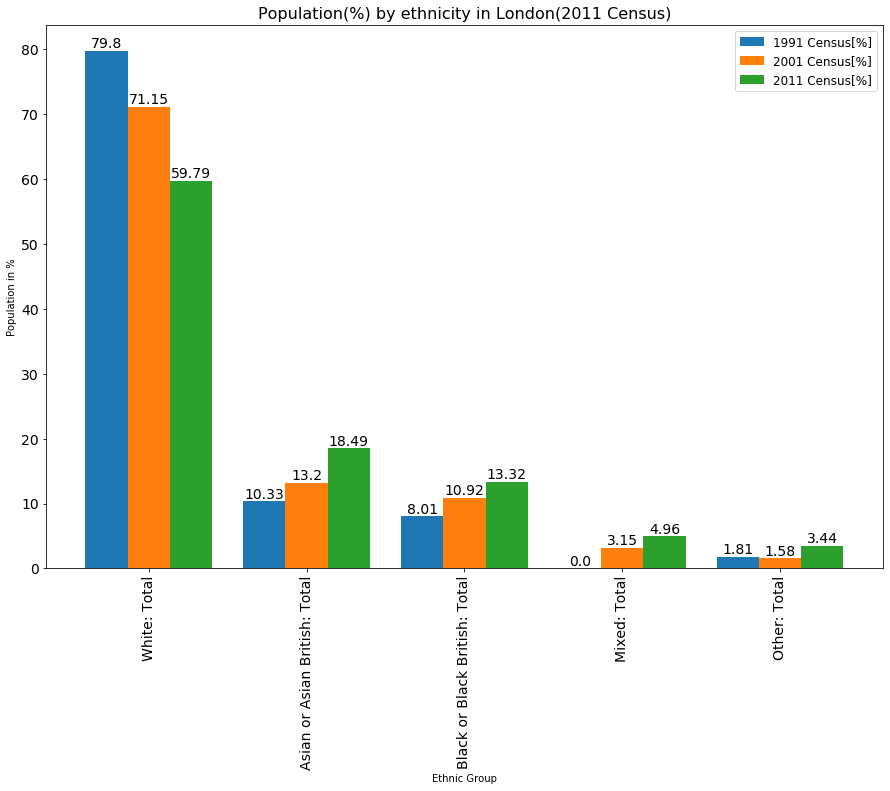

In [11]:
import matplotlib.pyplot as plt

ax = london_ethnic_fig2.plot(kind='bar',
               figsize= (15, 10),
               width= 0.8,
               fontsize= 14)

ax.set_title("Population(%) by ethnicity in London(2011 Census)", fontsize=16)
ax.set_ylabel('Population in %')
ax.set_xlabel('Ethnic Group')
              
ax.legend(prop=dict(size=12))
for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        va = 'top'
        label = y_value

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Vertically shift label by `space`
            xytext= (0,14),
            textcoords="offset points",
            ha='center',                # Horizontally center label
            va=va,                      
            fontsize=14)

plt.show()

### 2.2.2 To Proceed further with analysis I need list of all boroughs of london which I will get by web scraping wikipedia page

In [12]:
import bs4

URL = 'https://en.wikipedia.org/wiki/London_boroughs'
response = requests.get(URL)

try:
    response.raise_for_status()
    soup = bs4.BeautifulSoup(response.text, 'html.parser')
    
except Exception as exc:
    print('Error while downloading the webpage.. %s' % exc)

In [13]:
# Getting the table containing the borough names
Data = soup.find('table', attrs={'class':"wikitable sortable"})


In [14]:
# Using regex and getting the exact Borough names:

import re
column_name = ['London_Borough',] 
London_df = pd.DataFrame(columns=column_name)

for row in Data.findAll('tr'):
    line_item = row.findAll('td')
    if line_item:
        name1 = line_item[0].text.strip()
        re_obj = re.compile('\[')
        split_obj = re_obj.split(name1)
        borough_name = split_obj[0].strip()
        London_df = London_df.append({'London_Borough': borough_name},
                                        ignore_index=True)

In [15]:
London_df.head()

,London_Borough
0,Camden
1,Greenwich
2,Hackney
3,Hammersmith
4,Islington


In [16]:
# Changing names of couple of boroughs
London_df["London_Borough"].replace({"Hammersmith": "Hammersmith and Fulham", "Barking": "Barking and Dagenham"}, inplace=True)

In [17]:
Area = list(London_df["London_Borough"])
l = len(Area)

In [18]:
# Using geopy library to get the latitude and longitude of London Boroughs
latitudes = []
longitudes = []

for i in range(l):
    locality = Area[i]
    address = locality + ', London'

    geolocator = Nominatim(user_agent="london_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    latitudes.append(latitude)
    longitudes.append(longitude)
    
    #print('The geograpical coordinate of Toronto, Canada are {}, {}.'.format(latitude, longitude))
print(latitudes)
print(longitudes)

[51.5423045, 51.4820845, 51.5432402, 51.4920377, 51.5384287, 51.498480400000005, 51.5013012, 51.4624325, 51.5029222, 51.1325003, 51.4570271, 51.5004439, 51.5541171, 51.65309, 51.4416793, 51.563825800000004, 51.4028046, 51.3713049, 51.5126553, 51.6520851, 51.6014736, 51.596827149999996, 51.5443851, 51.542519299999995, 51.4686132, 51.4096275, 51.41086985, 51.52999955, 51.5763203, 51.4405529, 51.357464449999995, 51.59816935]
[-0.1395604, -0.0045417, -0.0493621, -0.2236401, -0.0999051, -0.1990432138025393, -0.117287, -0.0101331, -0.103458, 1.3028515, -0.1932607, -0.1265398, 0.15050434261994267, -0.2002261, 0.150488, -0.2757596561855699, 0.0148142, -0.101957, -0.3051952, -0.0810175, -0.1117815, -0.33731605402671094, -0.14430716398919305, -0.44833493117949663, -0.3613471, -0.3062621, -0.18809708858824303, 0.02931796029382208, 0.0454097, -0.3076394377337949, -0.17362689496950337, -0.01783667461048707]


In [19]:
London_df.insert(loc = 1,column='latitudes', value=latitudes)
London_df.insert(loc = 2,column='longitudes', value=longitudes)

In [20]:
London_df

,London_Borough,latitudes,longitudes
0,Camden,51.542305,-0.139560
1,Greenwich,51.482084,-0.004542
2,Hackney,51.543240,-0.049362
3,Hammersmith and Fulham,51.492038,-0.223640
4,Islington,51.538429,-0.099905
5,Kensington and Chelsea,51.498480,-0.199043
6,Lambeth,51.501301,-0.117287
7,Lewisham,51.462432,-0.010133
8,Southwark,51.502922,-0.103458
9,Tower Hamlets,51.132500,1.302852


In [21]:
#At quick glance on the table co-ordinates for "Tower Hamlets" seems odd so replaced with correct co-oridnates   
London_df.set_index('London_Borough', inplace=True)
London_df = London_df.drop(['Tower Hamlets'], axis=0)
London_df.reset_index(drop=False, inplace=True)
London_df.loc[31]= ['Tower Hamlets',51.5166670,-0.0499998]
London_df

,London_Borough,latitudes,longitudes
0,Camden,51.542305,-0.139560
1,Greenwich,51.482084,-0.004542
2,Hackney,51.543240,-0.049362
3,Hammersmith and Fulham,51.492038,-0.223640
4,Islington,51.538429,-0.099905
5,Kensington and Chelsea,51.498480,-0.199043
6,Lambeth,51.501301,-0.117287
7,Lewisham,51.462432,-0.010133
8,Southwark,51.502922,-0.103458
9,Wandsworth,51.457027,-0.193261


### 2.2.3 From "demography of London" page let's find more details about Racial make-up of London boroughs (2011 Census)

In [22]:
demo_link = 'https://en.wikipedia.org/wiki/Demography_of_London'
demo_page = requests.get(demo_link)
soup2 = BeautifulSoup(demo_page.content, 'html.parser')
table2 = soup2.find('table', {'class':'wikitable sortable'})

In [23]:
london_demo = pd.read_html(str(table2))
london_demo=pd.DataFrame(london_demo[0])
print(london_demo.shape)
london_demo

(33, 6)


,Local authority,White,Mixed,Asian,Black,Other
0,Barnet,64.1,4.8,18.5,7.7,4.8
1,Barking and Dagenham,58.3,4.2,15.9,20.0,1.6
2,Bexley,81.9,2.3,6.6,8.5,0.8
3,Brent,36.3,5.1,34.1,18.8,5.8
4,Bromley,84.3,3.5,5.2,6.0,0.9
5,Camden,66.3,5.6,16.1,8.2,3.8
6,City of London,78.6,3.9,12.7,2.6,2.1
7,Croydon,55.1,6.6,16.4,20.2,1.8
8,Ealing,49.0,4.5,29.7,10.9,6.0
9,Enfield,61.0,5.5,11.2,17.2,5.1


#### The list of boroughs scraped from wiki page contains 33 borough which includes ""City of London" but in London there are only 32 boroughs(Inner and Outer) so one additional borough appearing is "City of London" which is part of Greater london so I removed row "City of London" from dataframe

In [24]:
london_demo.rename(columns={'Local authority':'London_Borough'}, inplace=True)
london_demo.set_index('London_Borough', inplace=True)
london_demo = london_demo.drop(['City of London'], axis=0)
london_demo.reset_index(drop=False, inplace=True)
print(london_demo.shape)
london_demo.head(7)

(32, 6)


,London_Borough,White,Mixed,Asian,Black,Other
0,Barnet,64.1,4.8,18.5,7.7,4.8
1,Barking and Dagenham,58.3,4.2,15.9,20.0,1.6
2,Bexley,81.9,2.3,6.6,8.5,0.8
3,Brent,36.3,5.1,34.1,18.8,5.8
4,Bromley,84.3,3.5,5.2,6.0,0.9
5,Camden,66.3,5.6,16.1,8.2,3.8
6,Croydon,55.1,6.6,16.4,20.2,1.8


In [25]:
# Taking only necessory column
London_Asian_demo = london_demo[['London_Borough','Asian']]

#Soring by Asian 
London_Asian_demo= London_Asian_demo.sort_values(by='Asian', ascending = False)
London_Asian_demo.reset_index(drop=True, inplace=True)

In [26]:
#Merge Latitude and Longitude columns from London_df
London_Asian_cord = London_Asian_demo.merge(London_df, on=['London_Borough'])
London_Asian_cord

,London_Borough,Asian,latitudes,longitudes
0,Newham,43.5,51.530000,0.029318
1,Harrow,42.6,51.596827,-0.337316
2,Redbridge,41.8,51.576320,0.045410
3,Tower Hamlets,41.1,51.516667,-0.050000
4,Hounslow,34.4,51.468613,-0.361347
5,Brent,34.1,51.563826,-0.275760
6,Ealing,29.7,51.512655,-0.305195
7,Hillingdon,25.3,51.542519,-0.448335
8,Waltham Forest,21.1,51.598169,-0.017837
9,Barnet,18.5,51.653090,-0.200226


In [27]:
#Using Geopy to get geographical co-ordinates of London
address = 'London, England'

geolocator = Nominatim(user_agent="london_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London, England are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London, England are 51.5073219, -0.1276474.


In [28]:
# Superimposing Asian population on the map of London
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough, r in zip(London_Asian_cord['latitudes'], London_Asian_cord['longitudes'], 
                                           London_Asian_cord['London_Borough'],London_Asian_cord['Asian']):
    label = borough
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=r/1.5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

Above map showing density of Asian ethnic group on the map of London. Newham, Redbridge, Harrow, Hounslow,Tower Hamlets,Brent and Ealing are the having large number of Asian ethnic group population 

Among all boroughs of London, Newham has had largest Asian community from many decades as per 2011 census data presented above. Upon some more research I found that Newham has the largest total population of Asian origin in London, and it is 20th most populous borough of all English districts of United Kingdom. So, through the analysis of demography of London, I narrowed down my search for best borough to Newham..

I will further explore districts of Newham borough to find out optimal location to open Asian restaurants

### 2.2.4. As the districts information is not readily available on the internet I will use wiki page to scrap Newham Districts 

In [29]:
#Getting list of neighbourhoods/district from wikipedia page into pandas list
district_name = []
borough_info = []

district_details = {}
Newham_link = 'https://en.wikipedia.org/wiki/London_Borough_of_Newham#Districts'
Newham_var = requests.get(Newham_link)
Newham_soup_var = bs4.BeautifulSoup(Newham_var.text, 'html.parser')
district_var = Newham_soup_var.find(class_='mw-headline',id='Districts') 

for dist in district_var.find_next('ul').findAll('li'):
    d2 = dist.text.strip()
    dist2 = d2.split('(')[0]
    district_name.append(dist2)
    borough_info.append('Newham')

In [30]:
#USing list to obtain coordinates through Geopy user agent 
latitude = []
longitude = []

for dist in district_name:
    address = '{},London,United Kingdom'.format(dist)
    geolocator = Nominatim(user_agent="London_agent", timeout=10)
    location = geolocator.geocode(address)
    if location:
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

print(district_name,latitude, longitude)

['Beckton', 'Canning Town', 'Custom House', 'Cyprus', 'East Ham', 'East Village', 'Forest Gate', 'Little Ilford', 'Manor Park', 'Maryland', 'Mill Meads', 'North Woolwich ', 'Plaistow ', 'Plashet', 'Silvertown', 'Stratford', 'Stratford City', 'Stratford Marsh', 'Stratford New Town', 'Temple Mills', 'Upton', 'Upton Park', 'Wallend', 'West Ham'] [51.5160797, 51.5139887, 51.5095972, 51.5084776, 51.5329628, 51.5481075, 51.5495236, 51.550298, 51.4269492, 51.5460532, 51.5303704, 51.5004071, 51.5311544, 51.5400084, 51.5013626, 51.541289, 51.541289, 51.5393249, 51.5506778, 51.550617, 51.4524572, 51.5351062, 51.5355384, 51.5280966] [0.0594257, 0.0082987, 0.0282919, 0.0639692, 0.0553201, -0.0091769, 0.0249248, 0.0625225, -0.1355069, 0.0059223, -0.0034965, 0.064154, 0.0166833, 0.0392744, 0.0385185, -0.0035472, -0.0035472, -0.0095941, 0.0029768, -0.0074722, 0.1275711, 0.0339842, 0.0643107, 0.0045685]


In [31]:
District_data = {'District': district_name,'Borough': borough_info, 'Latitude': latitude,'Longitude':longitude}
Newham_neighborhood = pd.DataFrame.from_dict(District_data)
Newham_neighborhood = Newham_neighborhood.dropna()
Newham_neighborhood

,District,Borough,Latitude,Longitude
0,Beckton,Newham,51.516080,0.059426
1,Canning Town,Newham,51.513989,0.008299
2,Custom House,Newham,51.509597,0.028292
3,Cyprus,Newham,51.508478,0.063969
4,East Ham,Newham,51.532963,0.055320
5,East Village,Newham,51.548108,-0.009177
6,Forest Gate,Newham,51.549524,0.024925
7,Little Ilford,Newham,51.550298,0.062522
8,Manor Park,Newham,51.426949,-0.135507
9,Maryland,Newham,51.546053,0.005922


#### Stratford and Stratford City  has same co-ordinates hence removing Stratford City data
#### At quick glance  Manor park and Upton district co-ordinates looks quite odd than others upon research on other sources it is confirmed the co-ordinates are incorrect so I added correct co-ordinates

In [32]:
Newham_neighborhood.set_index('District', inplace=True)

In [33]:
Newham_neighborhood = Newham_neighborhood.drop(['Stratford City','Manor Park','Upton'], axis=0)
Newham_neighborhood.reset_index(drop=False, inplace=True)
Newham_neighborhood

,District,Borough,Latitude,Longitude
0,Beckton,Newham,51.516080,0.059426
1,Canning Town,Newham,51.513989,0.008299
2,Custom House,Newham,51.509597,0.028292
3,Cyprus,Newham,51.508478,0.063969
4,East Ham,Newham,51.532963,0.055320
5,East Village,Newham,51.548108,-0.009177
6,Forest Gate,Newham,51.549524,0.024925
7,Little Ilford,Newham,51.550298,0.062522
8,Maryland,Newham,51.546053,0.005922
9,Mill Meads,Newham,51.530370,-0.003497


In [34]:
#Adding correct coordinates
Newham_neighborhood.loc[21]= ['Manor Park','Newham',51.550330,0.048580]
Newham_neighborhood.loc[22]= ['Upton','Newham',51.542278,0.026435]
Newham_neighborhood

,District,Borough,Latitude,Longitude
0,Beckton,Newham,51.516080,0.059426
1,Canning Town,Newham,51.513989,0.008299
2,Custom House,Newham,51.509597,0.028292
3,Cyprus,Newham,51.508478,0.063969
4,East Ham,Newham,51.532963,0.055320
5,East Village,Newham,51.548108,-0.009177
6,Forest Gate,Newham,51.549524,0.024925
7,Little Ilford,Newham,51.550298,0.062522
8,Maryland,Newham,51.546053,0.005922
9,Mill Meads,Newham,51.530370,-0.003497


In [35]:
#Using Geopy to get geographical co-ordinates of Newham

address = 'Newham,London,United Kingdom '

geolocator = Nominatim(user_agent="Newham_explorer", timeout=3)
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Newham are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Newham are 51.52999955, 0.02931796029382208.


In [36]:
# Superimposing neighbourhoods/districts on the map of Newham

map_newham = folium.Map(location=[latitude, longitude], zoom_start=10)

# Adding markers to map
for lat, lng, borough, loc in zip(Newham_neighborhood['Latitude'], 
                                  Newham_neighborhood['Longitude'],
                                  Newham_neighborhood['Borough'],
                                  Newham_neighborhood['District']):
    label = '{} - {}'.format(loc, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_newham)  
    
display(map_newham)

## 3.  Methdology 

### 3.1  Foursquare API Analysis

In [37]:
CLIENT_ID = '3JMVUJZSOKQLF4BGTLVOGZBSS4X0SAQGOIAL1JFOYGDCMAKG' # your Foursquare ID
CLIENT_SECRET = 'FQEA5I0UYVRUXZXXOPRQNHQUYNK251UXVZ4ZIUULBK1M5QHQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

### Go get nearby venues for districts of Newham

In [38]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000, limit=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [39]:
Newham_Venues = getNearbyVenues(names=Newham_neighborhood['District'],
                                   latitudes=Newham_neighborhood['Latitude'],
                                   longitudes=Newham_neighborhood['Longitude']
                               )

Beckton
Canning Town
Custom House
Cyprus
East Ham
East Village
Forest Gate
Little Ilford
Maryland
Mill Meads
North Woolwich 
Plaistow 
Plashet
Silvertown
Stratford
Stratford Marsh
Stratford New Town
Temple Mills
Upton Park
Wallend
West Ham
Manor Park
Upton


In [40]:
print(Newham_Venues.shape)
Newham_Venues.head()

(1043, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Beckton,51.51608,0.059426,East london Gymnastics Club,51.514107,0.060155,Gym / Fitness Center
1,Beckton,51.51608,0.059426,Lidl,51.515982,0.054794,Supermarket
2,Beckton,51.51608,0.059426,Home Bargains,51.516790,0.062967,Discount Store
3,Beckton,51.51608,0.059426,Lituanica,51.516442,0.062927,Grocery Store
4,Beckton,51.51608,0.059426,Pets at Home,51.520473,0.070494,Pet Store


In [42]:
print('The number of popular venues in each district of Newham Borough are as follows:')
Newham_Venues.groupby('District').count()

The number of popular venues in each district of Newham Borough are as follows:


,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Beckton,26,26,26,26,26,26
Canning Town,46,46,46,46,46,46
Custom House,63,63,63,63,63,63
Cyprus,22,22,22,22,22,22
East Ham,29,29,29,29,29,29
East Village,47,47,47,47,47,47
Forest Gate,24,24,24,24,24,24
Little Ilford,17,17,17,17,17,17
Manor Park,17,17,17,17,17,17


In [43]:
print('There are {} uniques categories.'.format(len(Newham_Venues['Venue Category'].unique())))

There are 163 uniques categories.


#### Remove General other categories other than resturant and food places

In [44]:
# list all the categories
unique_categories = Newham_Venues['Venue Category'].unique().tolist()
print(', '.join(str(x) for x in unique_categories))

Gym / Fitness Center, Supermarket, Discount Store, Grocery Store, Pet Store, Hotel, Furniture / Home Store, Coffee Shop, Bus Station, Clothing Store, Shopping Plaza, Soccer Field, Park, Hardware Store, Café, Light Rail Station, Bus Stop, Convenience Store, Gym, Pier, Nature Preserve, Lighthouse, Nightclub, Turkish Restaurant, Diner, Science Museum, Italian Restaurant, Fast Food Restaurant, Sandwich Place, Platform, Metro Station, Food & Drink Shop, Breakfast Spot, Gym Pool, Basketball Court, Harbor / Marina, Tunnel, Tapas Restaurant, Bridge, Wine Bar, Scenic Lookout, Hotel Bar, Bar, Thai Restaurant, Chinese Restaurant, Rafting, Pub, Steakhouse, Athletics & Sports, Beach, Restaurant, American Restaurant, Salad Place, Bed & Breakfast, Asian Restaurant, Middle Eastern Restaurant, Lebanese Restaurant, Boat or Ferry, Bistro, Tennis Court, Airport Terminal, Gastropub, Waterfront, Indian Restaurant, Bakery, Electronics Store, Pizza Place, Warehouse Store, Jewelry Store, Optical Shop, Sporting

In [45]:
general_categories  = ['Juice Bar','Wine Bar','Brewery','Liquor Store','Hotel Bar','Beer Bar','Business Service','Pub','Bar',
                       'Nightclub','Bakery','Rock Club','Hostel','Garden Center','Lounge','Golf Driving Range','Arcade',
                       'Cricket Ground','Indoor Play Area','Carpet Store','Antique Shop','Arts & Crafts Store','Newsstand',
                       'IT Services','Outlet Mall','Performing Arts Venue','Tea Room','Construction & Landscaping','Beach',
                       'Duty-free Shop','Beer Garden','Garden','Spa','Film Studio','Canal','Park','Hotel','Gym / Fitness Center',
                       'Supermarket','Discount Store','Grocery Store','Pet Store','Fountain','Bike Rental / Bike Share',
                       'Jewelry Store','Recording Studio','Dance Studio','Furniture / Home Store','Bus Station','Clothing Store',
                       'Shopping Plaza','Soccer Field','Hardware Store','Light Rail Station','Bus Stop','Gym','Pier','Platform',
                       'Convenience Store','Nature Preserve','Lighthouse','Science Museum','Basketball Court','Athletics & Sports',
                       'Harbor / Marina','Tunnel','Bridge','Scenic Lookout','Rafting','Steakhouse','Train Station','Exhibit','Dry Cleaner',
                       'Boat or Ferry','Tennis Court','Locksmith','Airport Terminal','Gastropub','Waterfront','Health Food Store','Airport Lounge','Gym Pool',
                       'Electronics Store','Warehouse Store','Optical Shop','Betting Shop','Butcher','Toy / Game Store',
                       'Lingerie Store','Bookstore','Department Store','Hockey Field','Art Gallery','Pool','Bubble Tea Shop',
                       'Gift Shop','Shopping Mall','Indie Theater','Indie Movie Theater','Pharmacy','General Entertainment',
                       'Video Game Store','Soccer Stadium','Flower Shop','Playground','Gas Station','Buffet',
                       'Auto Garage','Jazz Club','Skating Rink','Sporting Goods Shop','Movie Theater','Mobile Phone Shop',
                       'Track','Cosmetics Shop','Creperie','Sports Bar','Health & Beauty Service','Historic Site','Trail',
                       'Event Space','Sports Club','Metro Station','River','Plaza','Rental Car Location','Rugby Pitch','Boutique',
                       'Market','Theater','Dam','Go Kart Track','Airport','Museum','Airport Service','Paintball Field','Deli / Bodega',
                       'Factory','Burrito Place','Accessories Store','Kitchen Supply Store','Outdoor Sculpture','Stadium','Bridal Shop',
                       'Laser Tag','Canal Lock','Music Venue','Sculpture Garden','Gelato Shop','Multiplex','Stationery Store','Shoe Store',
                       'Lake','Bowling Alley','Gymnastics Gym','Home Service','Border Crossing','Currency Exchange']

In [46]:
food_categories =  list(set(unique_categories) - set(general_categories))
print(', '.join(str(x) for x in food_categories))

Café, Food Truck, Modern European Restaurant, Italian Restaurant, German Restaurant, Ice Cream Shop, Mexican Restaurant, Salad Place, Vegetarian / Vegan Restaurant, Turkish Restaurant, Portuguese Restaurant, Mediterranean Restaurant, Eastern European Restaurant, Lebanese Restaurant, Bed & Breakfast, Breakfast Spot, Fast Food Restaurant, Chocolate Shop, Burger Joint, Sandwich Place, American Restaurant, Middle Eastern Restaurant, Donut Shop, Food Court, Restaurant, Diner, Fried Chicken Joint, Coffee Shop, Latin American Restaurant, Sushi Restaurant, Food & Drink Shop, Doner Restaurant, Bistro, Asian Restaurant, Thai Restaurant, Bulgarian Restaurant, Pizza Place, Comfort Food Restaurant, Street Food Gathering, Frozen Yogurt Shop, Tapas Restaurant, Dessert Shop, Chinese Restaurant, English Restaurant, Fish & Chips Shop, Indian Restaurant


In [47]:
Newham_Venues = Newham_Venues[Newham_Venues['Venue Category'].isin(food_categories)].reset_index()
#Newham_Venues.reset_index(drop=True, inplace=True)
Newham_Venues.head(5)

,index,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,10,Beckton,51.516080,0.059426,Costa Coffee,51.519691,0.049029,Coffee Shop
1,16,Beckton,51.516080,0.059426,Costa Coffee,51.507426,0.062792,Coffee Shop
2,21,Beckton,51.516080,0.059426,Sainsbury's Café,51.521274,0.066631,Café
3,26,Canning Town,51.513989,0.008299,Costa Pronto,51.514415,0.008015,Coffee Shop
4,35,Canning Town,51.513989,0.008299,Meydan Sofrasi,51.516359,0.009132,Turkish Restaurant


In [48]:
print('There are {} uniques categories.'.format(len(Newham_Venues['Venue Category'].unique())))

There are 46 uniques categories.


#### I removed general categories and narrrowed down from 163 unique categories to 46 mostly to the venues related to restaurants or food selling places

In [49]:
Newham_Venues.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False)

Venue Category
Coffee Shop                      43
Café                             42
Indian Restaurant                29
Fast Food Restaurant             19
Sandwich Place                   18
Italian Restaurant               17
Restaurant                       16
Pizza Place                      16
Ice Cream Shop                   13
Asian Restaurant                 10
Burger Joint                     10
Fish & Chips Shop                 9
English Restaurant                6
Dessert Shop                      5
Food & Drink Shop                 5
Chinese Restaurant                5
Vegetarian / Vegan Restaurant     5
Mexican Restaurant                5
Modern European Restaurant        5
Thai Restaurant                   5
Mediterranean Restaurant          4
Frozen Yogurt Shop                4
Food Court                        4
Eastern European Restaurant       4
Donut Shop                        4
Breakfast Spot                    3
Portuguese Restaurant             3
Sushi Restaur

### 3.2 Perform one hot ecoding on the venues data to analyse each neighbourhood

In [50]:
Newham_onehot = pd.get_dummies(Newham_Venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Newham_onehot['District'] = Newham_Venues['District'] 

District = Newham_onehot['District']
Newham_onehot.drop(labels=['District'], axis=1,inplace = True)
Newham_onehot.insert(0, 'District', District)

Newham_onehot.head()

,District,American Restaurant,Asian Restaurant,Bed & Breakfast,Bistro,Breakfast Spot,Bulgarian Restaurant,Burger Joint,Café,Chinese Restaurant,Chocolate Shop,Coffee Shop,Comfort Food Restaurant,Dessert Shop,Diner,Doner Restaurant,Donut Shop,Eastern European Restaurant,English Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,German Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Latin American Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Pizza Place,Portuguese Restaurant,Restaurant,Salad Place,Sandwich Place,Street Food Gathering,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,Beckton,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Beckton,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Beckton,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Canning Town,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Canning Town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [51]:
Newham_onehot.shape

(339, 47)

In [52]:
Newham_grouped = Newham_onehot.groupby("District").mean().reset_index()
Newham_grouped.head()

,District,American Restaurant,Asian Restaurant,Bed & Breakfast,Bistro,Breakfast Spot,Bulgarian Restaurant,Burger Joint,Café,Chinese Restaurant,Chocolate Shop,Coffee Shop,Comfort Food Restaurant,Dessert Shop,Diner,Doner Restaurant,Donut Shop,Eastern European Restaurant,English Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,German Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Latin American Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Pizza Place,Portuguese Restaurant,Restaurant,Salad Place,Sandwich Place,Street Food Gathering,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,Beckton,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.333333,0.000000,0.0,0.666667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,Canning Town,0.000000,0.000000,0.000000,0.000000,0.058824,0.0,0.0,0.176471,0.000000,0.0,0.294118,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.117647,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.117647,0.0,0.0,0.000000,0.000000,0.058824,0.0
2,Custom House,0.041667,0.041667,0.041667,0.041667,0.000000,0.0,0.0,0.166667,0.083333,0.0,0.166667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.041667,0.0,0.0,0.041667,0.0,0.0,0.0,0.083333,0.041667,0.041667,0.0,0.0,0.083333,0.041667,0.000000,0.0
3,Cyprus,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,East Ham,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.100000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.300000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.1,0.0,0.000000,0.000000,0.100000,0.0,0.0,0.000000,0.000000,0.000000,0.0


In [54]:
num_top_venues = 10

for hood in Newham_grouped['District']:
    print("----"+hood+"----")
    temp = Newham_grouped[Newham_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Beckton----
                       venue  freq
0                Coffee Shop  0.67
1                       Café  0.33
2        American Restaurant  0.00
3                Pizza Place  0.00
4             Ice Cream Shop  0.00
5          Indian Restaurant  0.00
6         Italian Restaurant  0.00
7  Latin American Restaurant  0.00
8        Lebanese Restaurant  0.00
9   Mediterranean Restaurant  0.00


----Canning Town----
                        venue  freq
0                 Coffee Shop  0.29
1                        Café  0.18
2              Sandwich Place  0.12
3        Fast Food Restaurant  0.12
4                       Diner  0.06
5          Turkish Restaurant  0.06
6          Italian Restaurant  0.06
7              Breakfast Spot  0.06
8           Food & Drink Shop  0.06
9  Modern European Restaurant  0.00


----Custom House----
                 venue  freq
0                 Café  0.17
1          Coffee Shop  0.17
2     Tapas Restaurant  0.08
3   Chinese Restaurant  0.08
4           

In [55]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [56]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['District'] = Newham_grouped['District']

for ind in np.arange(Newham_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Newham_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beckton,Coffee Shop,Café,Comfort Food Restaurant,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,English Restaurant,Eastern European Restaurant,Donut Shop,Doner Restaurant
1,Canning Town,Coffee Shop,Café,Fast Food Restaurant,Sandwich Place,Italian Restaurant,Diner,Food & Drink Shop,Turkish Restaurant,Breakfast Spot,Burger Joint
2,Custom House,Coffee Shop,Café,Tapas Restaurant,Chinese Restaurant,Restaurant,Bistro,Italian Restaurant,Lebanese Restaurant,Middle Eastern Restaurant,American Restaurant
3,Cyprus,Coffee Shop,Comfort Food Restaurant,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,English Restaurant,Eastern European Restaurant,Donut Shop,Doner Restaurant,Diner
4,East Ham,Indian Restaurant,Fast Food Restaurant,Coffee Shop,Sandwich Place,Pizza Place,Vegetarian / Vegan Restaurant,English Restaurant,Eastern European Restaurant,Donut Shop,Doner Restaurant


In [57]:
Newham_grouped_clustering = Newham_grouped.drop('District', 1)

In [58]:
sum_of_squared_distances = []

K = range(1,10)
for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k).fit(Newham_grouped_clustering)
    kmeans.predict(Newham_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

1 2 3 4 5 6 7 8 9 

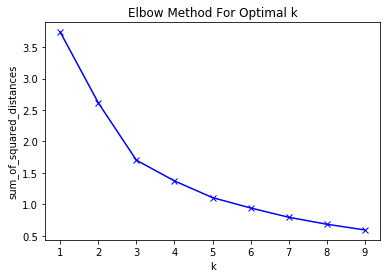

In [59]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k');

### 3.3	Modelling (K-Means Machine Learning algorithm)

In [63]:
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Newham_grouped_clustering)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_
labels

array([2, 0, 0, 2, 1, 0, 3, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 3, 1,
       0])

In [64]:
Newham_merged = Newham_neighborhood

Newham_merged['Cluster Labels'] = kmeans.labels_

# merge Newham_grouped with Newham_data to add latitude/longitude for each neighborhood
Newham_merged= Newham_merged.join(neighborhoods_venues_sorted.set_index('District'), on='District')

Newham_merged.head()

,District,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beckton,Newham,51.516080,0.059426,2,Coffee Shop,Café,Comfort Food Restaurant,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,English Restaurant,Eastern European Restaurant,Donut Shop,Doner Restaurant
1,Canning Town,Newham,51.513989,0.008299,0,Coffee Shop,Café,Fast Food Restaurant,Sandwich Place,Italian Restaurant,Diner,Food & Drink Shop,Turkish Restaurant,Breakfast Spot,Burger Joint
2,Custom House,Newham,51.509597,0.028292,0,Coffee Shop,Café,Tapas Restaurant,Chinese Restaurant,Restaurant,Bistro,Italian Restaurant,Lebanese Restaurant,Middle Eastern Restaurant,American Restaurant
3,Cyprus,Newham,51.508478,0.063969,2,Coffee Shop,Comfort Food Restaurant,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,English Restaurant,Eastern European Restaurant,Donut Shop,Doner Restaurant,Diner
4,East Ham,Newham,51.532963,0.055320,1,Indian Restaurant,Fast Food Restaurant,Coffee Shop,Sandwich Place,Pizza Place,Vegetarian / Vegan Restaurant,English Restaurant,Eastern European Restaurant,Donut Shop,Doner Restaurant


## 4 Result

In [65]:
address = 'Newham,London,United Kingdom '

geolocator = Nominatim(user_agent="Newham_explorer", timeout=3)
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Newham are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Newham are 51.52999955, 0.02931796029382208.


In [66]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Newham_merged['Latitude'], Newham_merged['Longitude'], Newham_merged['District'], Newham_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
        
map_clusters

In [78]:
required_column_indices = [0,5,6]
required_column = [list(Newham_merged.columns.values)[i] for i in required_column_indices]
required_column_indices = [0,5,6]

In [68]:
cluster_0 = Newham_merged.loc[Newham_merged['Cluster Labels'] == 0, Newham_merged.columns[0:15]]
cluster_0

,District,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Canning Town,Newham,51.513989,0.008299,0,Coffee Shop,Café,Fast Food Restaurant,Sandwich Place,Italian Restaurant,Diner,Food & Drink Shop,Turkish Restaurant,Breakfast Spot,Burger Joint
2,Custom House,Newham,51.509597,0.028292,0,Coffee Shop,Café,Tapas Restaurant,Chinese Restaurant,Restaurant,Bistro,Italian Restaurant,Lebanese Restaurant,Middle Eastern Restaurant,American Restaurant
5,East Village,Newham,51.548108,-0.009177,0,Café,Italian Restaurant,Vegetarian / Vegan Restaurant,Eastern European Restaurant,Ice Cream Shop,Dessert Shop,Mexican Restaurant,Modern European Restaurant,Coffee Shop,Burger Joint
9,Mill Meads,Newham,51.530370,-0.003497,0,Café,Food & Drink Shop,Thai Restaurant,Fish & Chips Shop,Street Food Gathering,Comfort Food Restaurant,Fast Food Restaurant,English Restaurant,Eastern European Restaurant,Donut Shop
10,North Woolwich,Newham,51.500407,0.064154,0,Coffee Shop,Breakfast Spot,Sandwich Place,Italian Restaurant,Chinese Restaurant,Dessert Shop,Fish & Chips Shop,Fast Food Restaurant,English Restaurant,Eastern European Restaurant
11,Plaistow,Newham,51.531154,0.016683,0,Coffee Shop,Bulgarian Restaurant,Food & Drink Shop,Fish & Chips Shop,Café,Fried Chicken Joint,Breakfast Spot,Doner Restaurant,Asian Restaurant,Bed & Breakfast
12,Plashet,Newham,51.540008,0.039274,0,Indian Restaurant,Fast Food Restaurant,Sandwich Place,Asian Restaurant,Ice Cream Shop,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,English Restaurant,Eastern European Restaurant,Donut Shop
14,Stratford,Newham,51.541289,-0.003547,0,Café,Coffee Shop,Italian Restaurant,Burger Joint,Sandwich Place,Pizza Place,Ice Cream Shop,Dessert Shop,Donut Shop,Eastern European Restaurant
15,Stratford Marsh,Newham,51.539325,-0.009594,0,Café,Restaurant,Burger Joint,English Restaurant,Sandwich Place,Coffee Shop,Pizza Place,Ice Cream Shop,Italian Restaurant,Doner Restaurant
16,Stratford New Town,Newham,51.550678,0.002977,0,Restaurant,Pizza Place,Café,Indian Restaurant,Italian Restaurant,Coffee Shop,Food Truck,English Restaurant,Eastern European Restaurant,Ice Cream Shop


In [79]:
for col in required_column:
    print(cluster_0[col].value_counts(ascending = False))
    print("---------------------------------------------")

Custom House          1
Upton Park            1
Stratford New Town    1
Temple Mills          1
Plashet               1
East Village          1
Upton                 1
Stratford Marsh       1
Canning Town          1
Stratford             1
North Woolwich        1
Plaistow              1
Mill Meads            1
Name: District, dtype: int64
---------------------------------------------
Coffee Shop             5
Café                    4
Indian Restaurant       1
Restaurant              1
Fast Food Restaurant    1
Fish & Chips Shop       1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Café                    3
Asian Restaurant        2
Bulgarian Restaurant    1
Pizza Place             1
Food & Drink Shop       1
Restaurant              1
Fast Food Restaurant    1
Coffee Shop             1
Breakfast Spot          1
Italian Restaurant      1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------


In [70]:
cluster_1 = Newham_merged.loc[Newham_merged['Cluster Labels'] == 1, Newham_merged.columns[0:15]]
cluster_1

,District,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,East Ham,Newham,51.532963,0.055320,1,Indian Restaurant,Fast Food Restaurant,Coffee Shop,Sandwich Place,Pizza Place,Vegetarian / Vegan Restaurant,English Restaurant,Eastern European Restaurant,Donut Shop,Doner Restaurant
7,Little Ilford,Newham,51.550298,0.062522,1,Indian Restaurant,Fast Food Restaurant,Ice Cream Shop,Restaurant,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,English Restaurant,Eastern European Restaurant,Donut Shop,Doner Restaurant
8,Maryland,Newham,51.546053,0.005922,1,Pizza Place,Café,Coffee Shop,Indian Restaurant,Burger Joint,Mediterranean Restaurant,English Restaurant,Eastern European Restaurant,Donut Shop,Food Court
13,Silvertown,Newham,51.501363,0.038518,1,Coffee Shop,Sandwich Place,Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Asian Restaurant,Bistro,Café,Chinese Restaurant,Italian Restaurant
21,Manor Park,Newham,51.550330,0.048580,1,Indian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,Fish & Chips Shop,Fast Food Restaurant,English Restaurant,Eastern European Restaurant,Donut Shop,Doner Restaurant


In [80]:
for col in required_column:
    print(cluster_1[col].value_counts(ascending = False))
    print("---------------------------------------------")

Maryland         1
East Ham         1
Manor Park       1
Little Ilford    1
Silvertown       1
Name: District, dtype: int64
---------------------------------------------
Indian Restaurant    3
Coffee Shop          1
Pizza Place          1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Fast Food Restaurant    2
Restaurant              1
Café                    1
Sandwich Place          1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------


In [72]:
cluster_2 = Newham_merged.loc[Newham_merged['Cluster Labels'] == 2, Newham_merged.columns[0:15]]
cluster_2

,District,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beckton,Newham,51.516080,0.059426,2,Coffee Shop,Café,Comfort Food Restaurant,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,English Restaurant,Eastern European Restaurant,Donut Shop,Doner Restaurant
3,Cyprus,Newham,51.508478,0.063969,2,Coffee Shop,Comfort Food Restaurant,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,English Restaurant,Eastern European Restaurant,Donut Shop,Doner Restaurant,Diner


In [82]:
for col in required_column:
    print(cluster_2[col].value_counts(ascending = False))
    print("---------------------------------------------")

Cyprus     1
Beckton    1
Name: District, dtype: int64
---------------------------------------------
Coffee Shop    2
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Café                       1
Comfort Food Restaurant    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------


In [74]:
cluster_3 = Newham_merged.loc[Newham_merged['Cluster Labels'] == 3, Newham_merged.columns[0:15]]
cluster_3

,District,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Forest Gate,Newham,51.549524,0.024925,3,Fast Food Restaurant,Asian Restaurant,Ice Cream Shop,Restaurant,Café,Comfort Food Restaurant,Vegetarian / Vegan Restaurant,Dessert Shop,Fish & Chips Shop,English Restaurant
19,Wallend,Newham,51.535538,0.064311,3,Indian Restaurant,Coffee Shop,Fast Food Restaurant,Breakfast Spot,Sandwich Place,Comfort Food Restaurant,Fish & Chips Shop,English Restaurant,Eastern European Restaurant,Donut Shop
20,West Ham,Newham,51.528097,0.004568,3,Coffee Shop,Food & Drink Shop,Fish & Chips Shop,Café,Comfort Food Restaurant,Fast Food Restaurant,English Restaurant,Eastern European Restaurant,Donut Shop,Doner Restaurant


In [81]:
for col in required_column:
    print(cluster_3[col].value_counts(ascending = False))
    print("---------------------------------------------")

Forest Gate    1
West Ham       1
Wallend        1
Name: District, dtype: int64
---------------------------------------------
Indian Restaurant       1
Fast Food Restaurant    1
Coffee Shop             1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Asian Restaurant     1
Coffee Shop          1
Food & Drink Shop    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------


## 5. Discussion

Due to diversity of the Newham in each neighbourhood there is an assortment of most common venues and there are numerous ethnic restaurants as well. Our analysis is focused on finding optimal neighbourhood for opening Asian restaurant so to understand the clusters let us find out which neighbourhood has most common venues related to Asian ethnicity. From cluster 0, Custom House, Plashet, Upton Park, Upton, Silvertown are the neighbourhoods with the highest number of Asian restaurants. In cluster 1, Indian Restaurant is most common across all the neighbourhoods and these are not crowded with other Asian cuisines. Cluster 2 is not famous for Asian cuisine hence opening an Asian restaurant in these neighbourhoods will not be profitable. In Cluster 3 Forest Gate and Wallend has Asian restaurant in top 2 most common venue.

## 6. Conclusion

One application of Clustering Algorithm, k-Means or others, to a multi-dimensional dataset, a very inquisitive result can be curated which helps to understand and visualize the data. The neighbourhoods of Newham borough are very briefly segmented into four clusters based on most common venue hence when looking for a restaurant location, one must consider who else is doing business in the neighbourhood. If there are already many restaurants with the same concept of ethnic cooking, then it will not be a profitable deal to choose that location such neighbourhoods are mostly appearing in cluster 0. While neighbourhoods in cluster 1 are most common for Asian ethnic venue but at the same time less crowded with Asian restaurants. To enjoy maximum patrons in the restaurant, the neighbourhoods from cluster 1 are assumed best choice to open Asian restaurant. The results of this project can be improved and made more inquisitive by considering neighbourhoods of other boroughs which has high proportion of Asian population. The scope of this project can be expanded further to choose best borough for opening Asian or other ethnic concept restaurants and suggest a new vendor a profitable location in diverse city like London.